In [25]:
%pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 688.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 939.6 kB/s eta 0:00:00 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105789 sha256=a2b7efd0e609bb24ebc701fd1d32c08d1c65ab1d58aa7cd1b4cf0538ac4c94f7
  Stored in directory: /Users/mattsalomon/Library/Caches/pip/wheels/14/e4/0d/a3409c4d5ec4fcc54cdd5713cacfcdcff6125e9d5392d7cd92
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0 requires numpy>=1.20.3, whi

In [2]:
# import kaggle.cli
# import sys
# import pandas as pd
# from pathlib import Path
# from zipfile import ZipFile

# # download data set
# # https://www.kaggle.com/unsdsn/world-happiness?select=2017.csv
# #https://www.kaggle.com/datasets/shashwatwork/insurance-claim-dataset?select=Inpatient_Claim.csv
# dataset = "shashwatwork/insurance-claim-dataset"
# sys.argv = [sys.argv[0]] + f"datasets download {dataset}".split(" ")
# kaggle.cli.main()

# zfile = ZipFile(f"{dataset.split('/')[1]}.zip")

# dfs = {f.filename:pd.read_csv(zfile.open(f)) for f in zfile.infolist() }

# dfs

In [5]:
# dfs['Inpatient_Claim.csv'].columns

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n_samples = 6000

# Helper functions to generate synthetic data
def generate_age():
    return np.random.randint(18, 90, n_samples)

def generate_income_level():
    return np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.5, 0.2])

def generate_boolean_feature(p_true=0.5):
    return np.random.choice([0, 1], n_samples, p=[1-p_true, p_true])

def generate_categorical_feature(categories, p=None):
    return np.random.choice(categories, n_samples, p=p)

# Generate data for features
data = {
    'PatientID': np.arange(1, n_samples + 1),
    'PatientAge': generate_age(),
    'PatientGender': generate_categorical_feature(['Male', 'Female', 'Other'], [0.48, 0.48, 0.04]),
    'PatientZipCode': np.random.randint(10000, 99999, n_samples),
    'PatientIncomeLevel': generate_income_level(),
    'PatientInsuranceType': generate_categorical_feature(['Private', 'Medicaid', 'Medicare', 'None'], [0.5, 0.2, 0.2, 0.1]),
    'PreExistingConditions': np.random.randint(0, 5, n_samples),
    'ChronicIllness': generate_boolean_feature(0.2),
    'PatientSmokingStatus': generate_categorical_feature(['Never', 'Former', 'Current'], [0.6, 0.3, 0.1]),
    'PatientWeight': np.random.normal(70, 15, n_samples).round(1),
    
    'ProviderID': np.random.randint(1000, 9999, n_samples),
    'ProviderType': generate_categorical_feature(['Hospital', 'Clinic', 'Physician', 'Pharmacy'], [0.4, 0.3, 0.2, 0.1]),
    'ProviderRegion': generate_categorical_feature(['East', 'West', 'North', 'South']),
    'ProviderSpecialty': generate_categorical_feature(['Cardiology', 'Pediatrics', 'Dermatology', 'Orthopedics']),
    'ProviderReputation': np.random.normal(3, 0.7, n_samples).round(1),  # rating out of 5
    'ProviderOwnership': generate_categorical_feature(['Public', 'Private']),
    'ProviderYearsInBusiness': np.random.randint(1, 50, n_samples),
    'ProviderAccreditation': generate_categorical_feature(['None', 'National', 'International'], [0.5, 0.3, 0.2]),
    'ProviderErrorRate': np.random.uniform(0, 0.05, n_samples).round(4),
    'ProviderSatisfactionScore': np.random.normal(4, 0.5, n_samples).round(1),  # score out of 5
    
    'ClaimID': np.arange(1, n_samples + 1),
    'ClaimAmount': np.random.normal(5000, 2000, n_samples).round(2),
    'ClaimType': generate_categorical_feature(['Inpatient', 'Outpatient', 'Emergency', 'Prescription']),
    'ClaimProcedureCode': np.random.randint(100, 999, n_samples),
    'ClaimServiceDuration': np.random.randint(1, 30, n_samples),
    'ClaimBillingCode': np.random.randint(1000, 9999, n_samples),
    'ClaimDiagnosisCode': np.random.randint(100, 999, n_samples),
    'ClaimSubmissionMethod': generate_categorical_feature(['Electronic', 'Paper'], [0.8, 0.2]),
    'ClaimApprovalTime': np.random.randint(1, 60, n_samples),
    'ClaimReferralStatus': generate_boolean_feature(0.3),
    'ClaimAppealed': generate_boolean_feature(0.1),
    'ClaimErrors': np.random.randint(0, 5, n_samples),
    'ClaimPriorAuthorization': generate_boolean_feature(0.5),
    'ClaimResubmitted': generate_boolean_feature(0.1),
    
    'InsurancePlanType': generate_categorical_feature(['HMO', 'PPO', 'POS']),
    'InsurancePremium': np.random.normal(200, 50, n_samples).round(2),
    'InsuranceCoveragePercent': np.random.uniform(50, 100, n_samples).round(1),
    'InsuranceDeductible': np.random.randint(0, 5000, n_samples),
    'InsuranceCoPay': np.random.randint(0, 50, n_samples),
    'InsuranceMaxOutOfPocket': np.random.randint(1000, 10000, n_samples),
    'InsuranceStatus': generate_categorical_feature(['Active', 'Expired'], [0.9, 0.1]),
    'InsuranceClaimLimit': np.random.randint(1, 100, n_samples),
    'InsuranceNetworkStatus': generate_boolean_feature(0.85),
    'InsuranceLatePaymentStatus': generate_boolean_feature(0.1),
    
    'BillingDate': pd.date_range(start='2020-01-01', periods=n_samples, freq='D'),
    'BillingEntity': generate_categorical_feature(['Hospital', 'Clinic', 'Pharmacy']),
    'BillingAmount': np.random.normal(5500, 1500, n_samples).round(2),
    'BillingErrorCode': np.random.randint(100, 999, n_samples),
    'BillingResubmissionStatus': generate_boolean_feature(0.05),
    'PaymentMethod': generate_categorical_feature(['Credit Card', 'Cash', 'Check', 'Insurance']),
    'PaymentStatus': generate_categorical_feature(['Paid', 'Unpaid', 'Partially Paid']),
    'PaymentDueDate': pd.date_range(start='2020-02-01', periods=n_samples, freq='D'),
    'PaymentLateFee': np.random.uniform(0, 100, n_samples).round(2),
    'PaymentDiscount': np.random.uniform(0, 500, n_samples).round(2),
    
    'ComplianceWithHIPAA': generate_boolean_feature(0.95),
    'ComplianceWithMedicare': generate_boolean_feature(0.8),
    'ComplianceWithStateRegulations': generate_boolean_feature(0.9),
    'PolicyNumber': np.random.randint(100000, 999999, n_samples),
    'PolicyEffectiveDate': pd.date_range(start='2019-01-01', periods=n_samples, freq='D'),
    'PolicyExpiryDate': pd.date_range(start='2021-01-01', periods=n_samples, freq='D'),
    'PolicyRenewalStatus': generate_boolean_feature(0.7),
    'PolicyCoverageGap': np.random.randint(0, 60, n_samples),
    'PolicyClaimLimitExceeded': generate_boolean_feature(0.05),
    'PolicyExceptions': np.random.randint(0, 5, n_samples),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Introduce correlation to 'ClaimStatus'
# Higher claim amounts, more errors, and low provider reputation will increase the chance of denial
df['ClaimStatus'] = (
    (df['ClaimAmount'] > 7000) | 
    (df['ClaimErrors'] > 2) | 
    (df['ProviderReputation'] < 2.5) | 
    (df['InsuranceCoveragePercent'] < 60) | 
    (df['PreExistingConditions'] > 2)
).astype(int)

# Print sample data
df.head()

# Save the dataset to CSV
# df.to_csv('healthcare_claims_dataset.csv', index=False)


,PatientID,PatientAge,PatientGender,PatientZipCode,PatientIncomeLevel,PatientInsuranceType,PreExistingConditions,ChronicIllness,PatientSmokingStatus,PatientWeight,...,ComplianceWithMedicare,ComplianceWithStateRegulations,PolicyNumber,PolicyEffectiveDate,PolicyExpiryDate,PolicyRenewalStatus,PolicyCoverageGap,PolicyClaimLimitExceeded,PolicyExceptions,ClaimStatus
0,1,69,Male,91032,High,Private,3,0,Former,58.2,...,1,1,532341,2019-01-01,2021-01-01,1,51,0,2,1
1,2,32,Female,12928,Low,Private,0,0,Never,71.9,...,0,1,841665,2019-01-02,2021-01-02,0,39,0,1,0
2,3,89,Male,75158,Low,Private,0,0,Never,89.2,...,1,1,383231,2019-01-03,2021-01-03,1,53,0,0,1
3,4,78,Male,40632,High,None,3,0,Never,87.7,...,0,1,363412,2019-01-04,2021-01-04,0,52,0,3,1
4,5,38,Female,42309,High,Medicare,4,0,Never,75.1,...,0,1,905708,2019-01-05,2021-01-05,0,55,0,0,1


In [7]:
df = df.select_dtypes(['int','float','object'])

In [8]:
df = pd.get_dummies(df)

In [14]:
X ,y = df[[x for x in df.columns if x!='ClaimStatus']], df['ClaimStatus']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
    y, test_size=0.33, random_state=42)

In [16]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# # Generate an imbalanced dataset
# X, y = make_classification(n_classes=2, class_sep=2,
#                            weights=[0.9, 0.1], n_informative=3, 
#                            n_redundant=1, flip_y=0, 
#                            n_features=20, n_clusters_per_class=1, 
#                            n_samples=1000, random_state=42)

# print('Original dataset shape:', Counter(y))

# Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y)

print('Training dataset shape:', Counter(Y_train))
print('Test dataset shape:', Counter(Y_test))

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

print('Resampled training dataset shape:', Counter(Y_train))

Training dataset shape: Counter({1: 3242, 0: 778})
Test dataset shape: Counter({1: 1604, 0: 376})
Resampled training dataset shape: Counter({1: 3242, 0: 3242})


In [18]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(6484, 95) (1980, 95) (6484,) (1980,)


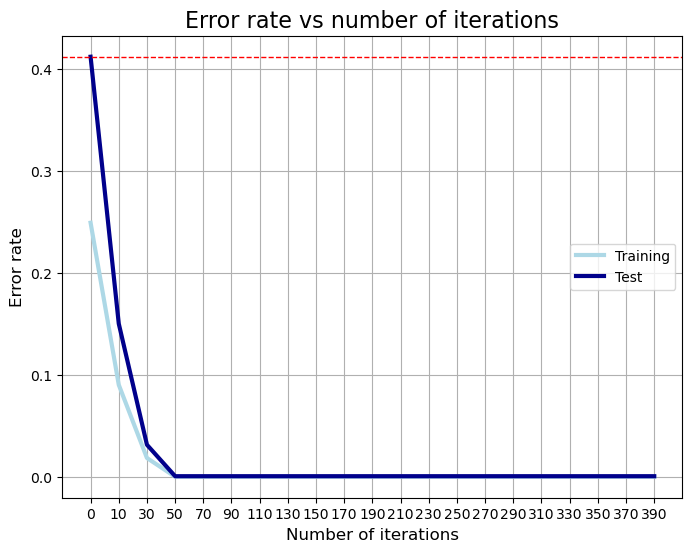

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return np.mean(pred != Y)

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print('Error rate: Training: %.4f - Test: %.4f' % err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
        
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train = X_train.shape[0]
    w = np.ones(n_train) / n_train  # Initialize weights
    pred_train = np.zeros(n_train)
    pred_test = np.zeros(X_test.shape[0])

    for i in range(M):
        # Fit the classifier with the current weights
        clf.fit(X_train, Y_train, sample_weight=w)
        
        # Predict on training and test data
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        
        # Ensure predictions are in -1 and 1
        pred_train_i[pred_train_i == 0] = -1
        pred_test_i[pred_test_i == 0] = -1
        
        # Calculate misclassification
        incorrect = (pred_train_i != Y_train).astype(int)
        
        # Compute error
        err_m = np.dot(w, incorrect)
        
        # Avoid division by zero or log of zero
        err_m = max(err_m, 1e-10)
        err_m = min(err_m, 1 - 1e-10)
        
        # Compute alpha
        alpha_m = 0.5 * np.log((1 - err_m) / err_m)
        
        # Update weights
        w *= np.exp(-alpha_m * Y_train * pred_train_i)
        w /= w.sum()  # Normalize weights
        
        # Update predictions
        pred_train += alpha_m * pred_train_i
        pred_test += alpha_m * pred_test_i

    # Final prediction
    pred_train = np.sign(pred_train)
    pred_test = np.sign(pred_test)
    
    # Compute error rates
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test,rng):
    df_error = pd.DataFrame({'Training': er_train, 'Test': er_test})
    plot1 = df_error.plot(linewidth=3, figsize=(8,6),
                          color=['lightblue', 'darkblue'], grid=True)
    plot1.set_xlabel('Number of iterations', fontsize=12)
    plot1.set_xticks(range(len(er_train)))
    plot1.set_xticklabels([0] + list(rng))
    plot1.set_ylabel('Error rate', fontsize=12)
    plot1.set_title('Error rate vs number of iterations', fontsize=16)
    plt.axhline(y=er_test[0], linewidth=1, color='red', ls='dashed')
    plt.show()

""" MAIN SCRIPT ============================================================="""
if __name__ == '__main__':
    # Example data (replace with your own)
#     X, y = make_hastie_10_2(n_samples=5000)
#     df = pd.DataFrame(X)
#     df['Y'] = y
    
#     #Use your dataset here
#     X_train, X_test, Y_train, Y_test = train_test_split(
#         df.iloc[:,:-1], df['Y'], test_size=0.2, random_state=42)
    
    #Ensure labels are -1 and 1
    Y_train[Y_train == 0] = -1
    Y_test[Y_test == 0] = -1
    
    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
    er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
    
    # Initialize error lists
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 410, 20)
    
    for i in x_range:    
        er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test, x_range)